In [64]:
import pandas as pd
import yfinance as yf
import numpy as np
import seaborn as sns
import datetime
%matplotlib inline

In [66]:
tickers = ["BAC","C","GS","JPM","MS","WFC"]

In [68]:
df = yf.download(tickers, start="2006-01-01", end="2016-01-01")

[*********************100%***********************]  6 of 6 completed


In [70]:
df.head()

Price           Close                                                          \
Ticker            BAC           C         GS        JPM         MS        WFC   
Date                                                                            
2006-01-03  31.173674  324.013031  95.293121  24.241707  32.190907  18.778111   
2006-01-04  30.842619  318.031158  93.976898  24.101795  32.212982  18.560301   
2006-01-05  30.882326  319.608826  93.939903  24.174801  32.301327  18.539709   
2006-01-06  30.835968  319.608826  95.270935  24.345125  32.334446  18.648605   
2006-01-09  30.855843  318.096802  96.417068  24.740540  32.676723  18.645662   

Price            High                                    ...       Open  \
Ticker            BAC           C         GS        JPM  ...         GS   
Date                                                     ...              
2006-01-03  31.239887  324.604652  95.714614  24.344248  ...  93.688513   
2006-01-04  31.279633  322.764164  95.322705  24.418124  ...  94.169157   
2006-01-05  31.008135  320.660587  94.146949  24.217383  ...  93.170873   
2006-01-06  31.061097  321.449428  95.574113  24.478957  ...  94.124789   
2006-01-09  31.100837  320.397564  96.587139  24.770958  ...  95.019506   

Price                                          Volume                    \
Ticker            JPM         MS        WFC       BAC        C       GS   
Date                                                                      
2006-01-03  24.024565  31.561551  18.601514  16296700  1537600  6188700   
2006-01-04  24.199127  32.406206  18.719237  17757900  1870960  4861600   
2006-01-05  24.095718  32.323410  18.542652  14970700  1143160  3717400   
2006-01-06  24.284291  32.444859  18.589740  12599800  1370210  4319600   
2006-01-09  24.259965  32.367568  18.645662  15619400  1680740  4723500   

Price                                    
Ticker           JPM       MS       WFC  
Date                                     
2006-01-03  12838600  5377000  11016400  
2006-01-04  13491500  7977800  10870000  
2006-01-05   8109400  5778000  10158000  
2006-01-06   7966900  6889800   8403800  
2006-01-09  16575200  4144500   5619600  

[5 rows x 30 columns]

In [72]:
df['Close']['BAC'].max()

37.699588775634766

In [74]:
for tick in tickers:
    print(tick,  df['Close'][tick].max())

BAC 37.699588775634766
C 386.29278564453125
GS 186.076171875
JPM 53.933902740478516
MS 50.462806701660156
WFC 44.26810836791992


In [76]:
df.columns.names = ('Bank Ticker', 'Stock Info')

In [78]:
df.xs(key = 'Close', axis=1)

Stock Info,BAC,C,GS,JPM,MS,WFC
Date,,,,,,
2006-01-03,31.173674,324.013031,95.293121,24.241707,32.190907,18.778111
2006-01-04,30.842619,318.031158,93.976898,24.101795,32.212982,18.560301
2006-01-05,30.882326,319.608826,93.939903,24.174801,32.301327,18.539709
2006-01-06,30.835968,319.608826,95.270935,24.345125,32.334446,18.648605
2006-01-09,30.855843,318.096802,96.417068,24.740540,32.676723,18.645662
...,...,...,...,...,...,...
2015-12-24,14.103422,40.187359,150.992493,51.625504,24.987904,42.026814
2015-12-28,13.989092,39.935749,150.289200,51.454975,24.749411,41.919491
2015-12-29,14.111588,40.393204,151.869675,51.989834,25.041758,42.387131


### Returns Dataframe

In [80]:
returns = pd.DataFrame()

In [82]:
for tick in tickers:
    returns[tick+ ' Return'] = df['Close'][tick].pct_change()

In [84]:
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.005772,0.000686,-0.011599
2006-01-05,0.001287,0.004961,-0.000394,0.003029,0.002743,-0.001109
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000645,-0.004731,0.012030,0.016242,0.010586,-0.000158


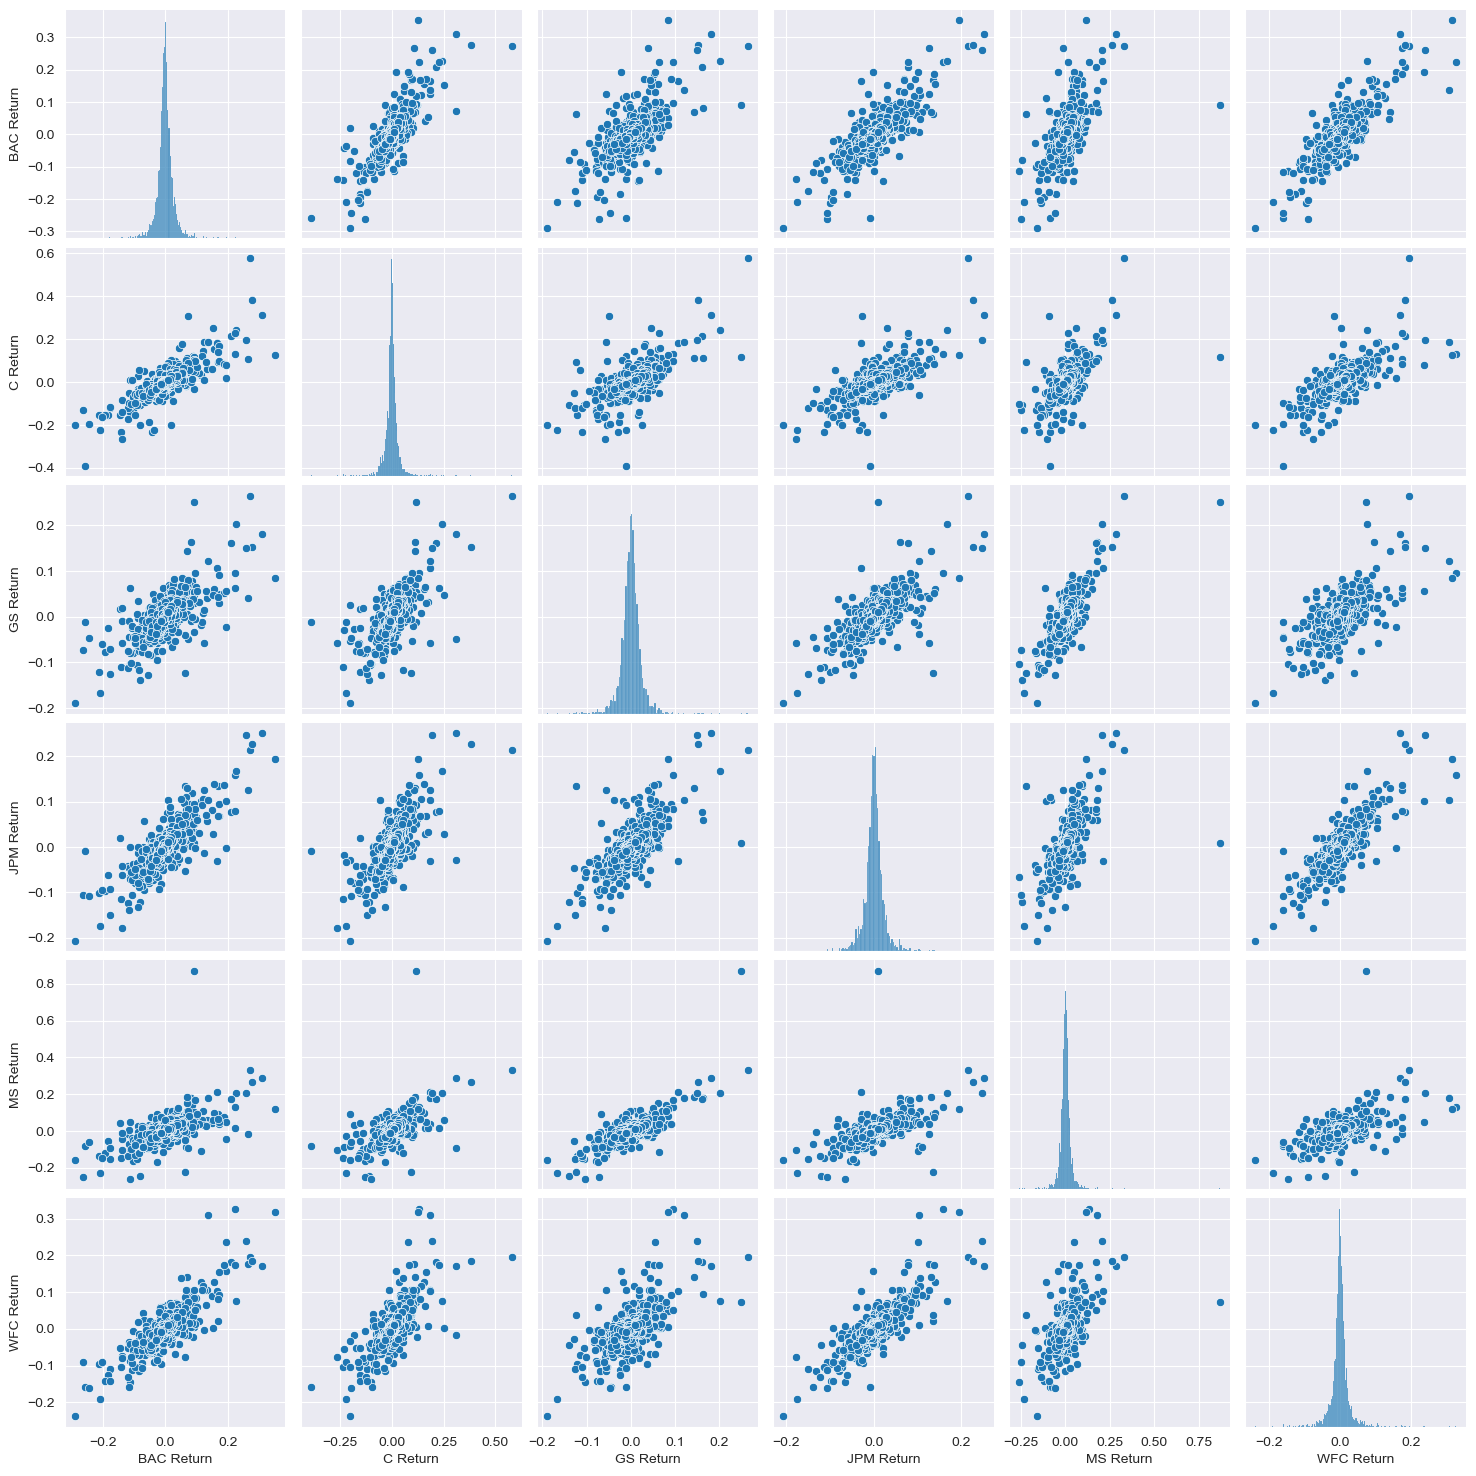

In [86]:
sns.set_style(style='darkgrid')
sns.pairplot(returns[1:])

### Using this return DataFRame, figure out on what dates each bank stock had the best and worst single day returns.

In [88]:
returns.idxmax()

BAC Return   2009-04-09
C Return     2008-11-24
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

In [90]:
returns.idxmin()

BAC Return   2009-01-20
C Return     2009-02-27
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

### Take a look at the SD of the returns, which stock would you classify as the riskiest over the entire time period ? Which stock would you classify as the riskiest for the year 2015?

In [92]:
returns.std()

BAC Return    0.036659
C Return      0.038672
GS Return     0.025386
JPM Return    0.027675
MS Return     0.037717
WFC Return    0.030195
dtype: float64

In [94]:
returns.loc['2015-01-01': '2015-12-31'].std()

BAC Return    0.016174
C Return      0.015288
GS Return     0.014043
JPM Return    0.014006
MS Return     0.016287
WFC Return    0.012552
dtype: float64

### Create a displot using seaborn of the 2015 returns for Morgan Stanley?

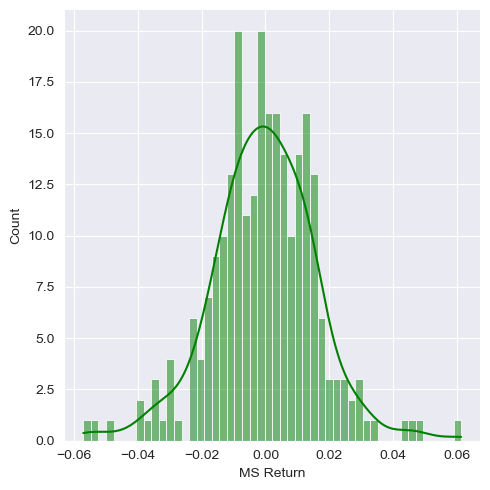

In [96]:
sns.displot(returns.loc['2015-01-01': '2015-12-31']['MS Return'],color='green',bins=50,kde=True)

### Create a distplot using seaborn of the 2008 returns for CitiGroup?

C:\Users\USER\anaconda3\envs\data_env_old\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='C Return', ylabel='Density'>

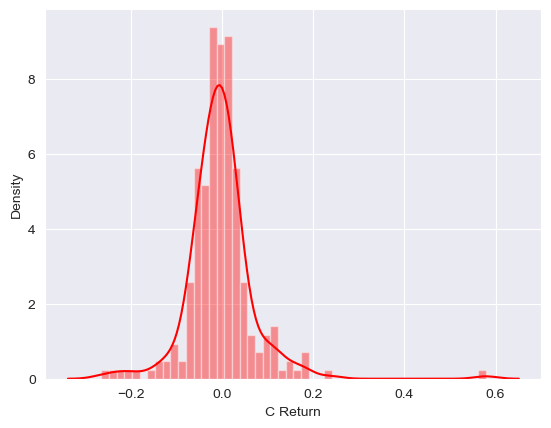

In [98]:
sns.distplot(returns.loc['2008-01-01': '2008-12-31']['C Return'],color='red', bins=50)

#SD of Citigroup is 0.6 which is 10 times more than the Morgan Stanley 0.06

In [220]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style(style='whitegrid')
%matplotlib inline

import plotly
import plotly.express as px
import cufflinks as cf
cf.go_offline()

### Create a lineplot showing Closing price for each bank for the entire index of time.(Try using a for loop, or use.xs to get a cross section of the data)

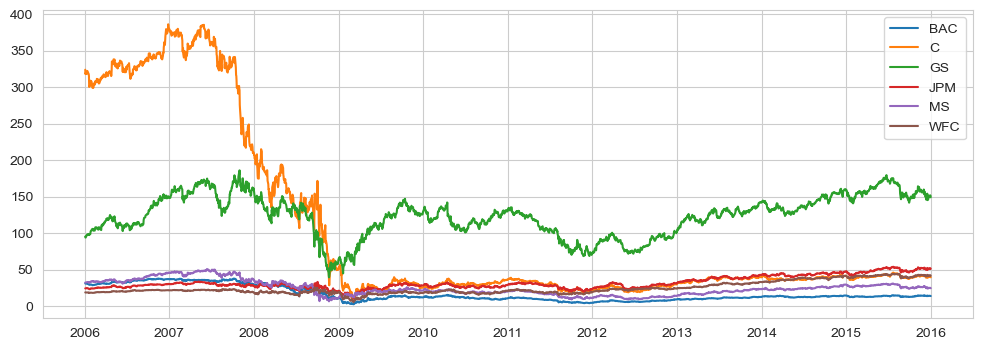

In [102]:
plt.figure(figsize=(12, 4))
for tick in tickers:
    plt.plot(df['Close'][tick], label=tick)
plt.legend()

<AxesSubplot:xlabel='Date'>

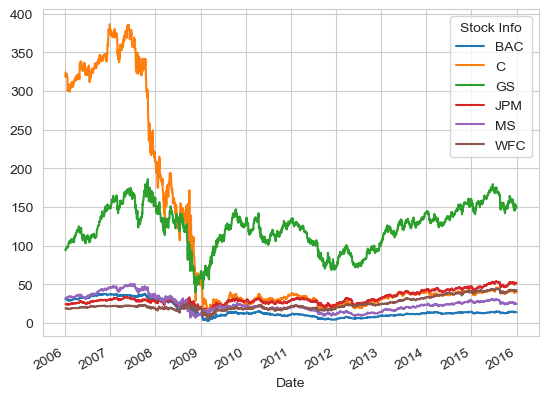

In [104]:
df.xs(key ='Close', axis=1).plot()

### Plot the rolling 30 day average against the Close Price for Bank of America's stock for the year 2008

In [190]:
df.head()

Bank Ticker      Close                                               \
Stock Info         BAC           C         GS        JPM         MS   
Date                                                                  
2006-01-03   31.173674  324.013031  95.293121  24.241707  32.190907   
2006-01-04   30.842619  318.031158  93.976898  24.101795  32.212982   
2006-01-05   30.882326  319.608826  93.939903  24.174801  32.301327   
2006-01-06   30.835968  319.608826  95.270935  24.345125  32.334446   
2006-01-09   30.855843  318.096802  96.417068  24.740540  32.676723   

Bank Ticker                  High                                    ...  \
Stock Info         WFC        BAC           C         GS        JPM  ...   
Date                                                                 ...   
2006-01-03   18.778111  31.239887  324.604652  95.714614  24.344248  ...   
2006-01-04   18.560301  31.279633  322.764164  95.322705  24.418124  ...   
2006-01-05   18.539709  31.008135  320.660587  94.146949  24.217383  ...   
2006-01-06   18.648605  31.061097  321.449428  95.574113  24.478957  ...   
2006-01-09   18.645662  31.100837  320.397564  96.587139  24.770958  ...   

Bank Ticker       Open                                     Volume           \
Stock Info          GS        JPM         MS        WFC       BAC        C   
Date                                                                         
2006-01-03   93.688513  24.024565  31.561551  18.601514  16296700  1537600   
2006-01-04   94.169157  24.199127  32.406206  18.719237  17757900  1870960   
2006-01-05   93.170873  24.095718  32.323410  18.542652  14970700  1143160   
2006-01-06   94.124789  24.284291  32.444859  18.589740  12599800  1370210   
2006-01-09   95.019506  24.259965  32.367568  18.645662  15619400  1680740   

Bank Ticker                                        
Stock Info        GS       JPM       MS       WFC  
Date                                               
2006-01-03   6188700  12838600  5377000  11016400  
2006-01-04   4861600  13491500  7977800  10870000  
2006-01-05   3717400   8109400  5778000  10158000  
2006-01-06   4319600   7966900  6889800   8403800  
2006-01-09   4723500  16575200  4144500   5619600  

[5 rows x 30 columns]

In [192]:
df['Close']

Stock Info,BAC,C,GS,JPM,MS,WFC
Date,,,,,,
2006-01-03,31.173674,324.013031,95.293121,24.241707,32.190907,18.778111
2006-01-04,30.842619,318.031158,93.976898,24.101795,32.212982,18.560301
2006-01-05,30.882326,319.608826,93.939903,24.174801,32.301327,18.539709
2006-01-06,30.835968,319.608826,95.270935,24.345125,32.334446,18.648605
2006-01-09,30.855843,318.096802,96.417068,24.740540,32.676723,18.645662
...,...,...,...,...,...,...
2015-12-24,14.103422,40.187359,150.992493,51.625504,24.987904,42.026814
2015-12-28,13.989092,39.935749,150.289200,51.454975,24.749411,41.919491
2015-12-29,14.111588,40.393204,151.869675,51.989834,25.041758,42.387131


In [194]:
df['Close']['BAC']

Date
2006-01-03    31.173674
2006-01-04    30.842619
2006-01-05    30.882326
2006-01-06    30.835968
2006-01-09    30.855843
                ...    
2015-12-24    14.103422
2015-12-28    13.989092
2015-12-29    14.111588
2015-12-30    13.923759
2015-12-31    13.744096
Name: BAC, Length: 2517, dtype: float64

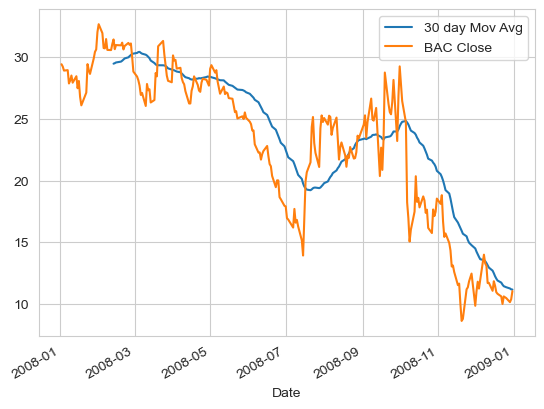

In [198]:
df['Close']['BAC'].loc['2008-01-01': '2009-01-01'].rolling(window=30).mean().plot(label = '30 day Mov Avg')
df['Close']['BAC'].loc['2008-01-01': '2009-01-01'].plot(label = 'BAC Close')
plt.legend()

### Create a heatmap of the correlation between the Stocks Close price

<AxesSubplot:xlabel='Stock Info', ylabel='Stock Info'>

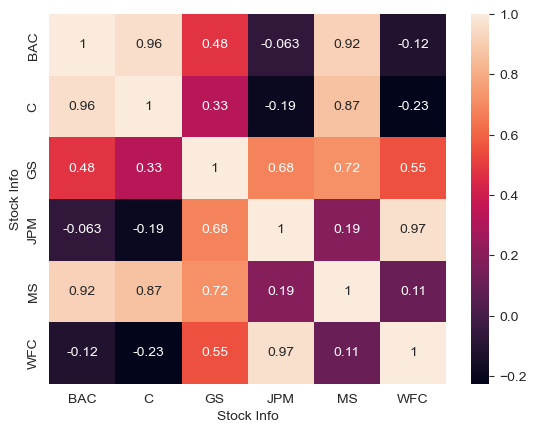

In [209]:
sns.heatmap(df.xs(key = 'Close', axis=1).corr(), annot=True)

### Use seaborn's clustermap to cluster the correlation together

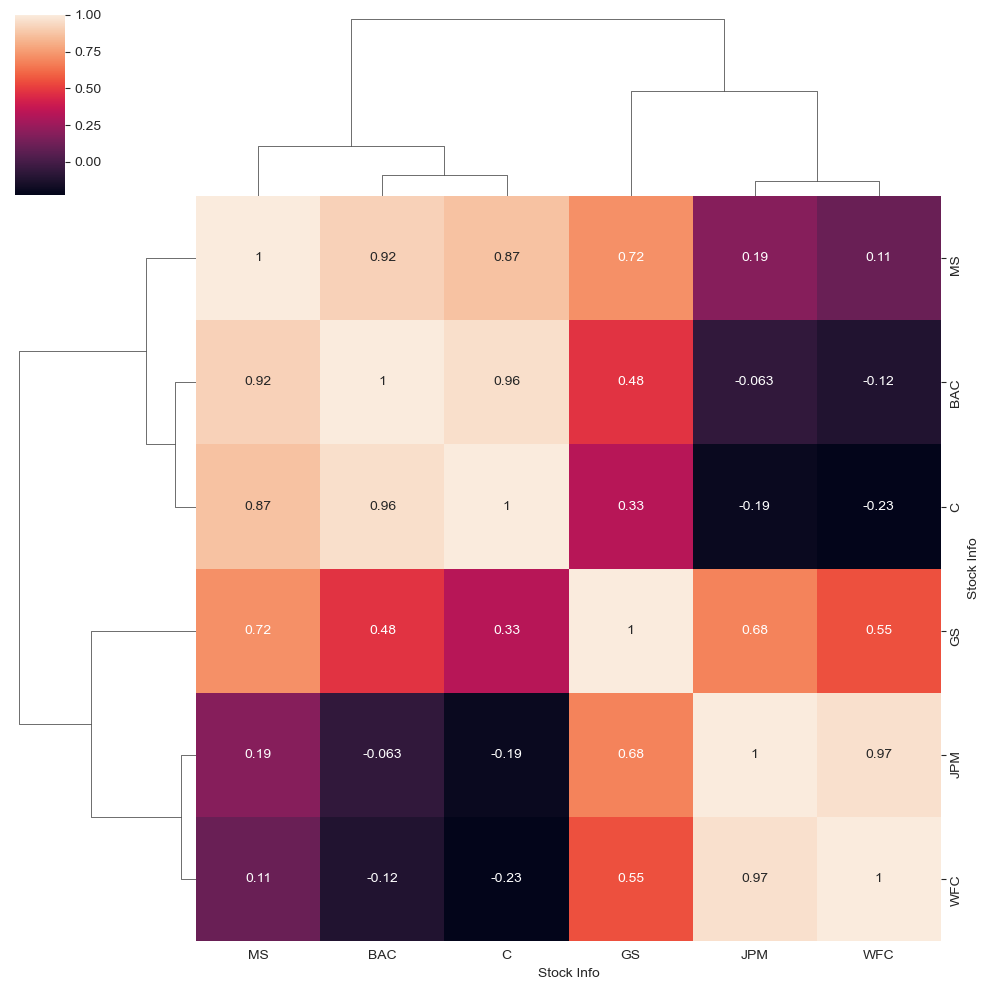

In [212]:
sns.clustermap(df.xs(key = 'Close', axis=1).corr(), annot=True)

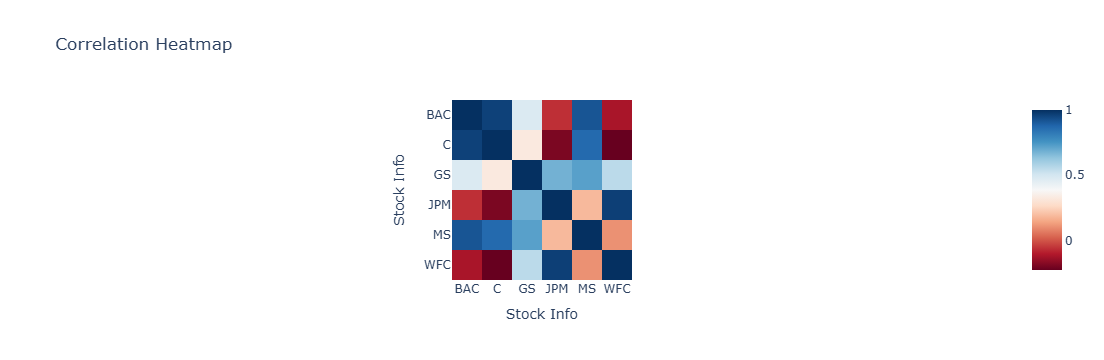

In [228]:
close_prices = df.xs(key = 'Close', axis=1)
close_corr = close_prices.corr()

fig = px.imshow(close_corr,
                color_continuous_scale='RdBu',
                title = 'Correlation Heatmap')

fig.show()